# Person Simulations

In this notebook you will work with Pandas to simulate people based on the `Person` class defined in `person.py`.

In [1]:
from nose.tools import assert_equal, assert_true, assert_raises, assert_almost_equal

In [2]:
import pandas as pd
import dateutil
import datetime
import time
from dateutil.relativedelta import *
import numpy.random as ra
import math
import random
import seaborn as sns
import numpy as np
import numbers

#### Import our Person class

In [3]:
from person import Person

## Get Name Data

Here we read in two files containing name data. 

### `first_names`


The Social Security Administration provides the [names of babies](https://www.ssa.gov/oact/babynames/limits.html) born in the United States between 1880 and 2016. For privacy purposes names occurring fewer than 5 times per year are excluded. A dictionary containing these name, along with their probabilities and cumulative probabilities is stored in a compressed pickle file `first_names.pickle.gz`. Use Python to read the dictionary into this notebook.

`first_names` is a dictionary with years as keys and values dictionaries keyed on sex `('M','F')`  with values Pandas DataFrames with name data.

For example:
```Python
first_names[1937]['F'].tail()
```
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>sex</th>
      <th>count</th>
      <th>probability</th>
      <th>cumulative_probability</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>4</th>
      <td>Betty</td>
      <td>F</td>
      <td>25330</td>
      <td>0.028153</td>
      <td>0.839723</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Shirley</td>
      <td>F</td>
      <td>26816</td>
      <td>0.029804</td>
      <td>0.869528</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Patricia</td>
      <td>F</td>
      <td>26839</td>
      <td>0.029830</td>
      <td>0.899358</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Barbara</td>
      <td>F</td>
      <td>34908</td>
      <td>0.038798</td>
      <td>0.938156</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Mary</td>
      <td>F</td>
      <td>55643</td>
      <td>0.061844</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

```Python
print(first_names[1963]['M'].tail().to_html())
```

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>sex</th>
      <th>count</th>
      <th>probability</th>
      <th>cumulative_probability</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>7666</th>
      <td>Robert</td>
      <td>M</td>
      <td>70018</td>
      <td>0.037584</td>
      <td>0.832395</td>
    </tr>
    <tr>
      <th>7665</th>
      <td>James</td>
      <td>M</td>
      <td>71334</td>
      <td>0.038291</td>
      <td>0.870686</td>
    </tr>
    <tr>
      <th>7664</th>
      <td>David</td>
      <td>M</td>
      <td>78476</td>
      <td>0.042125</td>
      <td>0.912810</td>
    </tr>
    <tr>
      <th>7663</th>
      <td>John</td>
      <td>M</td>
      <td>78642</td>
      <td>0.042214</td>
      <td>0.955024</td>
    </tr>
    <tr>
      <th>7662</th>
      <td>Michael</td>
      <td>M</td>
      <td>83788</td>
      <td>0.044976</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

### `surnames`

Is a Pandas DataFrame with `surname` information`:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Surname</th>
      <th>Cumprob</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>4</th>
      <td>JONES</td>
      <td>0.951855</td>
    </tr>
    <tr>
      <th>3</th>
      <td>BROWN</td>
      <td>0.961152</td>
    </tr>
    <tr>
      <th>2</th>
      <td>WILLIAMS</td>
      <td>0.971485</td>
    </tr>
    <tr>
      <th>1</th>
      <td>JOHNSON</td>
      <td>0.983994</td>
    </tr>
    <tr>
      <th>0</th>
      <td>SMITH</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

#### Read in our name data.

In [4]:
first_names = pd.read_pickle("first_names.pickle.gz")
surnames = pd.read_hdf("surnames.hdf")


**Problem 1 (5 points):**

A common task with Pandas DataFrames or series is filtering the data to only keep rows that satisfy some criteria. For example, if I wanted to only keep names with an `"H"` in it, i could write a function

```Python
def filter1(v1, v2):
         return v1.apply(lambda x: v2 in x)
filter1(surnames['Surname'], 'H').tail()
```

```
4    False
3    False
2    False
1     True
0     True
Name: Surname, dtype: bool
```

Which could then be used to filter the DataFrame


```Python
surnames[filter1(surnames['Surname'], 'H')].tail()
```

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Surname</th>
      <th>Cumprob</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>18</th>
      <td>THOMPSON</td>
      <td>0.872905</td>
    </tr>
    <tr>
      <th>14</th>
      <td>HERNANDEZ</td>
      <td>0.891387</td>
    </tr>
    <tr>
      <th>13</th>
      <td>THOMAS</td>
      <td>0.896175</td>
    </tr>
    <tr>
      <th>1</th>
      <td>JOHNSON</td>
      <td>0.983994</td>
    </tr>
    <tr>
      <th>0</th>
      <td>SMITH</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

In [5]:
def filter1(v1, v2):
    return v1.apply(lambda x: v2 in x)

Write a function `filter1g` that generalizes `filter1` to test whether an aribtrary collection characters is in a value. For example, the following statement produces this output:

```Python
surnames[filter1g(surnames['Surname'], ('Q','E', 'I'))]
```

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Surname</th>
      <th>Cumprob</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2379</th>
      <td>SQUIRES</td>
      <td>0.072054</td>
    </tr>
    <tr>
      <th>1972</th>
      <td>QUIGLEY</td>
      <td>0.114091</td>
    </tr>
    <tr>
      <th>1219</th>
      <td>ESQUIVEL</td>
      <td>0.220093</td>
    </tr>
    <tr>
      <th>1216</th>
      <td>RODRIQUEZ</td>
      <td>0.220625</td>
    </tr>
    <tr>
      <th>1176</th>
      <td>QUINONES</td>
      <td>0.227856</td>
    </tr>
    <tr>
      <th>1071</th>
      <td>ENRIQUEZ</td>
      <td>0.248045</td>
    </tr>
    <tr>
      <th>1069</th>
      <td>QUINTERO</td>
      <td>0.248448</td>
    </tr>
  </tbody>
</table>


In [7]:
def filter1g(v1, v2):
    return v1.apply(lambda x: all([v in x for v in v2]))

    #raise NotImplementedError()

In [8]:
assert_equal(surnames[filter1g(surnames['Surname'], 
                               ('Q','E', 'I'))].shape, (7,2))

In [9]:
assert_true("MCCORMICK" in list(surnames[filter1g(surnames['Surname'], 
                               ('MC','O', 'I'))]['Surname']))

**Problem 2 (5 points):**
    
Write a function `filter2` similar to `filter1` and `filter1g` but which tests whether the values in `v1` and greater than or equal to the value `v2`.

In [10]:
def filter2(v1, v2):
    return v1.apply(lambda x: x >= v2)
    #raise NotImplementedError()

In [11]:
assert_equal(surnames[filter2(surnames["Cumprob"], 0.9353)].shape, (6,2))

In [12]:
assert_true("LIU" in tuple(surnames[filter2(surnames["Cumprob"], 0.353)]["Surname"]))

**Problem 3 (10 points)**:

Write a function `select_attribute` that takes as positional arguments 

* `df`: A Pandas DataFrame
* `value_column`: The name of a column to return values from (e.g. `name`)
* `select_column`: The name of a column to base the section on (e.g. `Cumprob`
* `filter_function`: A function (like `filter1g` or `filter2`) that is applied to `df`'s `select_column`.
* `filter_value`: The second argument to the `filter_function`.

`select_attribute` should return `value_column` in the first row of the filtered  DataFrame.


In [13]:
def select_attribute(df, 
                         value_column, 
                         select_column,
                         filter_function,
                         filter_value):
    return df[filter_function(df[select_column],filter_value)].iloc[0][value_column]
    #raise NotImplementedError()

In [14]:
assert_equal(select_attribute(surnames, "Surname", "Surname", 
                     filter1g, ("CH", "P")), 'CHAPIN')

In [15]:
assert_equal(select_attribute(surnames, "Surname", 
                                  "Cumprob", 
                                  filter2,
                                  0.355),"GOLDEN")

**Problem 4 (10 points):**

Write a function `get_sex` that takes a positional argument the proportion of the population that is female and returns `"F"` or `"M"` based on that proportion. The keyword argument `seed=None` is needed for testing.


In [16]:
def get_sex(female_proportion, seed=None):
    random.seed(seed)
    if female_proportion > 0.5:
        return 'F'
    else:
        return 'M'

#raise NotImplementedError()

In [17]:
assert_equal(get_sex(0.52, seed=1), "F")

In [18]:
assert_equal(get_sex(0.1, seed=1), "M")

**Problem 5 (10 points):**

Complete and correct `get_dob` so that it returns a `datetime.date`
uniformly distributed between last_year and first_year (January 1 of first_year).

```Python
def get_dob(last_year=None, first_year= 1918):
    """
    returns a datetime.date object uniformly distributed between
           January 1, first_year and last_year
    
    Arguments:
        last_year: If None, use current date
                   If an int, use the date of January 1, last_year 
        first_year: An integer representing first year from which to
                    potentially select a date of birth
    """
    fd = datetime.datetime(year=first_year, month=1, day=1).date
    if last_year:
        ld = datetime.datetime.fromtimestamp(time.time()).date
    else:
        ld = datetime.datetime(year=last_year, month=1, day=1).date
    end_range = time.mktime(ld.timetuple())
    
    start_range = time.mktime(fd.timetuple())

    
    datetime.datetime.fromtimestamp(
        random.randint(start_range, 
                       end_range)).date
```

In [19]:
def get_dob(last_year=None, first_year= 1918):
    """
    returns a datetime.date object uniformly distributed between
           January 1, first_year and last_year
    
    Arguments:
        last_year: If None, use current date
                   If an int, use the date of January 1, last_year 
        first_year: An integer representing first year from which to
                    potentially select a date of birth
    """
    fd = datetime.datetime(year=first_year, month=1, day=1).date()
    if last_year == None:
        ld = datetime.datetime.fromtimestamp(time.time()).date()
    else:
        ld = datetime.datetime(year=last_year, month=1, day=1).date()
    end_range = time.mktime(ld.timetuple())
 
    start_range = time.mktime(fd.timetuple())
 
 
    return datetime.datetime.fromtimestamp(
        random.randint(start_range, 
                       end_range)).date()

    #raise NotImplementedError()

#### Generated first year must be greater than or equal to `first_year`

#### We have to generate a lot of values to get our statistical estimates.

In [20]:
n1 = 50
rslt = [get_dob(first_year=1945) for i in range(n1)]
assert_true(min([r.year for r in rslt]) >= 1945)

#### Generated last year must be less than or equal to `last_year`

In [21]:
assert_true(max([r.year for r in rslt]) <= 2018)

In [22]:
n2 = 500
rslt = [get_dob(first_year=1945, last_year=1955) for i in range(n1)]
assert_true(max([r.year for r in rslt]) <= 1955)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


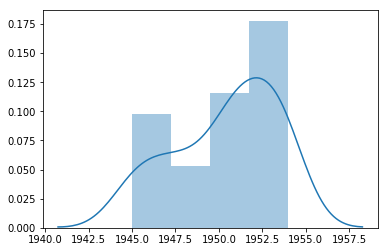

In [23]:
sns.distplot([r.year for r in rslt])

**Problem 6 (15 points):**

Complete and correct the function `generate_random_person` so that it properly returns a `Person` object with randomly determined attributes.

Year of birth should be 1918 and 2016.

```Python
def generate_random_person(surnames, first_names, 
                                   first_year=,
                                   last_year=,
                                   proportion_female=0.52):
    sex = get_sex(proportion_female)
    get_dob(first_year=first_year, last_year=last_year)
    name_value = random.random
    f_name = select_attribute(first_names[dob.year][sex], 
                              "name",
                              "cumulative_probability",
                              filter2,
                              name_value)

    name_value = random.random
    l_name = select_attribute(surnames, 
                              "Surname",
                              "cumulative_probability",
                              filter2,
                              name_value).capitalize()
    return Person(first_name=f_name, 
                  last_name=l_name,
                  dob=dob.strftime(""),
                  sex=sex)
```

In [24]:
def generate_random_person(surnames, first_names, 
                                   first_year=1918,
                                   last_year=2016,
                                   proportion_female=0.52):
    sex = get_sex(proportion_female)
    dob = get_dob(first_year=first_year, last_year=last_year)
    name_value = random.random()
    f_name = select_attribute(first_names[dob.year][sex], 
                              "name",
                              "cumulative_probability",
                              filter2,
                              name_value)
 
    name_value = random.random()
    l_name = select_attribute(surnames, 
                              "Surname",
                              "Cumprob",
                              filter2,
                              name_value).capitalize()
    return Person(first_name=f_name, 
                  last_name=l_name,
                  dob=dob.strftime("%B %d, %Y"),
                  sex=sex)

    #raise NotImplementedError()

In [25]:
n4=50
people = \
[generate_random_person(surnames, 
                        first_names,
                        first_year=1931,
                        last_year=1941,
                        proportion_female=1.0) for i in range(n4)]
assert_equal(len(people),n4)

In [26]:
assert_equal(len([p for p in people if p.sex == 'M']),0)

In [27]:
assert_equal(len([p for p in people if p.age["years"] <=87 and p.age["years"] >=77]),n4)